# Installing dependencies

In [26]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Plotting sentiment data 

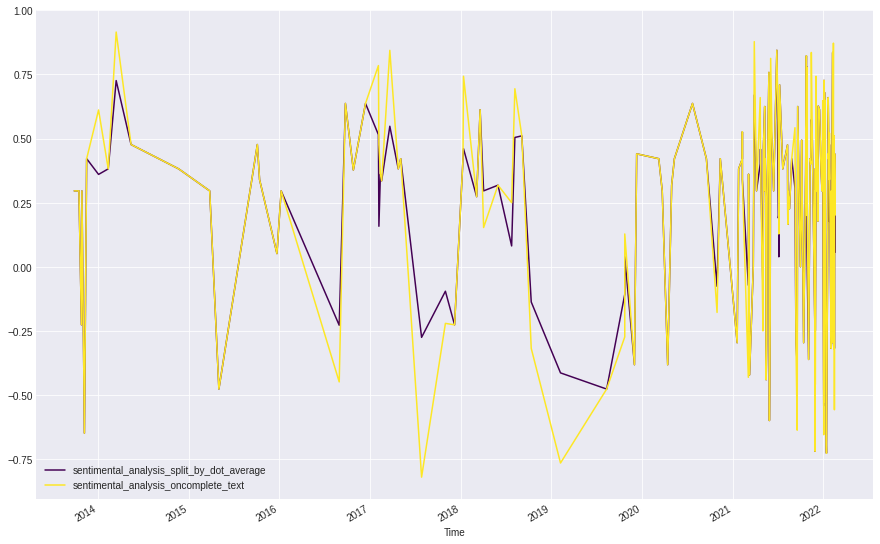

In [29]:
df_new = pd.read_pickle("/content/drive/MyDrive/twitter_processed_text_with_time_and_sentiments.pkl")
#df_text.head()
plt.style.use('seaborn-dark')
df_new[["sentimental_analysis_split_by_dot_average","sentimental_analysis_oncomplete_text"]].plot(cmap = "viridis",
                                                                                                 linestyle='-',figsize = (15,10))
plt.grid()
plt.show()

# Plotting stock prices data

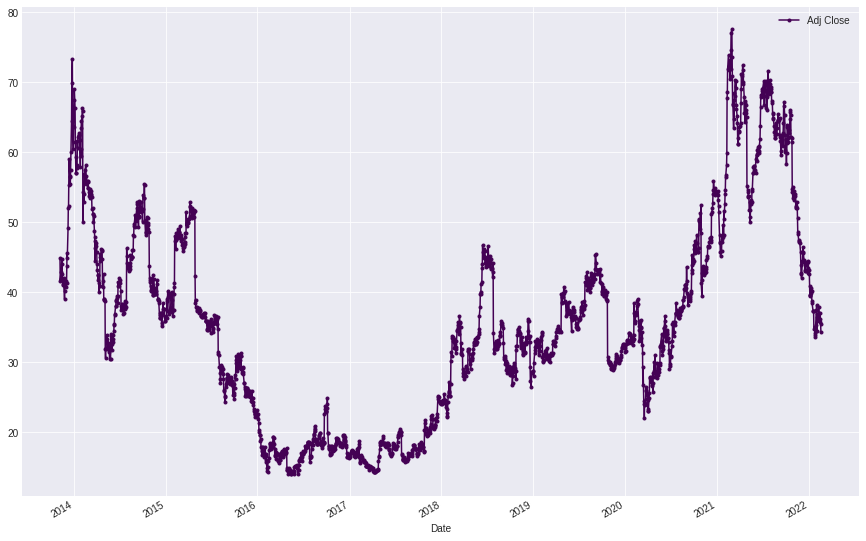

In [30]:
df_values = pd.read_pickle('/content/drive/MyDrive/twitter_stock_data_pk.pkl') 


twitter_df = df_values
twitter_df.plot(cmap = "viridis",linestyle='-',figsize = (15,10),marker='.')
plt.grid()
plt.show()

Data was combined using formulas in excel. Pandas methods weren't excatly working due to different date formats


# Loading the Merging the data to clean it 

In [31]:
df4 = pd.read_pickle('/content/drive/MyDrive/Stock+Sentiment_Twitter.pkl') #to load 123.pkl back to the dataframe df

In [32]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 5 to 178
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Time                                          159 non-null    object 
 1   Date                                          159 non-null    object 
 2   News source                                   159 non-null    object 
 3   Title                                         159 non-null    object 
 4   Description                                   159 non-null    object 
 5   index                                         159 non-null    int64  
 6   timestamp                                     159 non-null    float64
 7   uid                                           159 non-null    object 
 8   url                                           159 non-null    object 
 9   url_uid                                       159 non-null    int

Removing NaN values 

In [33]:
df4= df4[df4["Stock"].notna()]

In [34]:
df4.info()
df4.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 5 to 178
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Time                                          159 non-null    object 
 1   Date                                          159 non-null    object 
 2   News source                                   159 non-null    object 
 3   Title                                         159 non-null    object 
 4   Description                                   159 non-null    object 
 5   index                                         159 non-null    int64  
 6   timestamp                                     159 non-null    float64
 7   uid                                           159 non-null    object 
 8   url                                           159 non-null    object 
 9   url_uid                                       159 non-null    int

,index,timestamp,url_uid,sentimental_analysis_split_by_dot_average,sentimental_analysis_oncomplete_text,sentimental_analysis_oncomplete_text_average,Stock
count,159.000000,1.590000e+02,159.000000,159.000000,159.000000,159.000000,159.000000
mean,128.830189,1.650830e+12,13.320755,0.235128,0.248708,0.248708,43.980063
std,65.673840,0.000000e+00,6.540353,0.341140,0.398458,0.398458,14.212064
min,6.000000,1.650830e+12,1.000000,-0.726900,-0.820100,-0.820100,14.540000
25%,79.000000,1.650830e+12,8.000000,0.039000,0.089800,0.089800,34.590000
50%,128.000000,1.650830e+12,13.000000,0.307100,0.340000,0.340000,42.810001
75%,182.500000,1.650830e+12,19.000000,0.440400,0.485300,0.485300,54.810001
max,249.000000,1.650830e+12,25.000000,0.844200,0.915300,0.915300,70.209999


In [35]:
df4.shape

(159, 16)

df4.head()

In [36]:
df4['Stock'].replace('', np.nan, inplace=True)

In [37]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 5 to 178
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Time                                          159 non-null    object 
 1   Date                                          159 non-null    object 
 2   News source                                   159 non-null    object 
 3   Title                                         159 non-null    object 
 4   Description                                   159 non-null    object 
 5   index                                         159 non-null    int64  
 6   timestamp                                     159 non-null    float64
 7   uid                                           159 non-null    object 
 8   url                                           159 non-null    object 
 9   url_uid                                       159 non-null    int

In [38]:
#df4= df4[df4["Stock"].notna()]

df4.dropna(subset=['Stock'], inplace=True)

In [39]:
df4.shape

(159, 16)

In [40]:
df4.to_pickle('/content/drive/MyDrive/Stock+Sentiment_Twitter.pkl')